# Project Title
## Participants:
### Data Source



In [21]:
# Data Analysis Job Market 

In [74]:
# Import dependencies
import pandas as pd
import numpy as np
from scipy.stats import linregress
from pathlib import Path
import matplotlib.pyplot as plt
from pymongo import MongoClient
from pprint import pprint
import json

In [56]:
#Import csv file

csv_path = Path("Code/Salaries_updated_with_categories.csv")

# Read the CSV into a Pandas DataFrame
data_analysis_df = pd.read_csv(csv_path)



In [57]:
# Create a Dataframe

data_analysis_df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size,Job_Category
0,2024,MI,FT,AI Architect,800000,USD,800000,CA,100,CA,M,Other
1,2023,EN,FT,Data DevOps Engineer,44382,EUR,47918,NL,50,NL,L,Data Engineer
2,2024,EN,FT,Data Analyst,40100,EUR,44555,LT,0,LT,M,Data Analyst
3,2024,EN,FT,Data Analyst,28069,EUR,31187,LT,0,LT,M,Data Analyst
4,2024,SE,FT,Data Engineer,220000,USD,220000,US,0,US,M,Data Engineer


In [58]:
# Cleaning the Data - remove the columns "salary_currency" and "salary column"

In [59]:
# Understand the data limitations - columns with blank rows to build visuals and what columns to use 


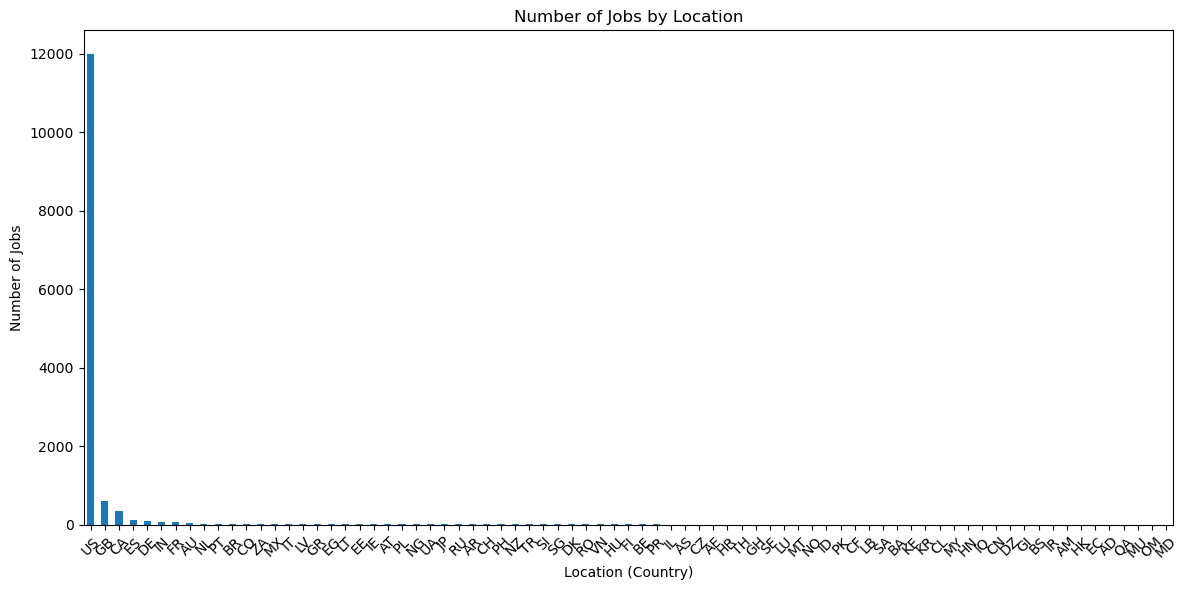

In [60]:
# create some graphs and bargraphs, etc....salaries, 

# jobs by location 
job_counts_by_location = data_analysis_df['company_location'].value_counts()
plt.figure(figsize=(12, 6))
job_counts_by_location.plot(kind='bar')
plt.title('Number of Jobs by Location')
plt.xlabel('Location (Country)')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

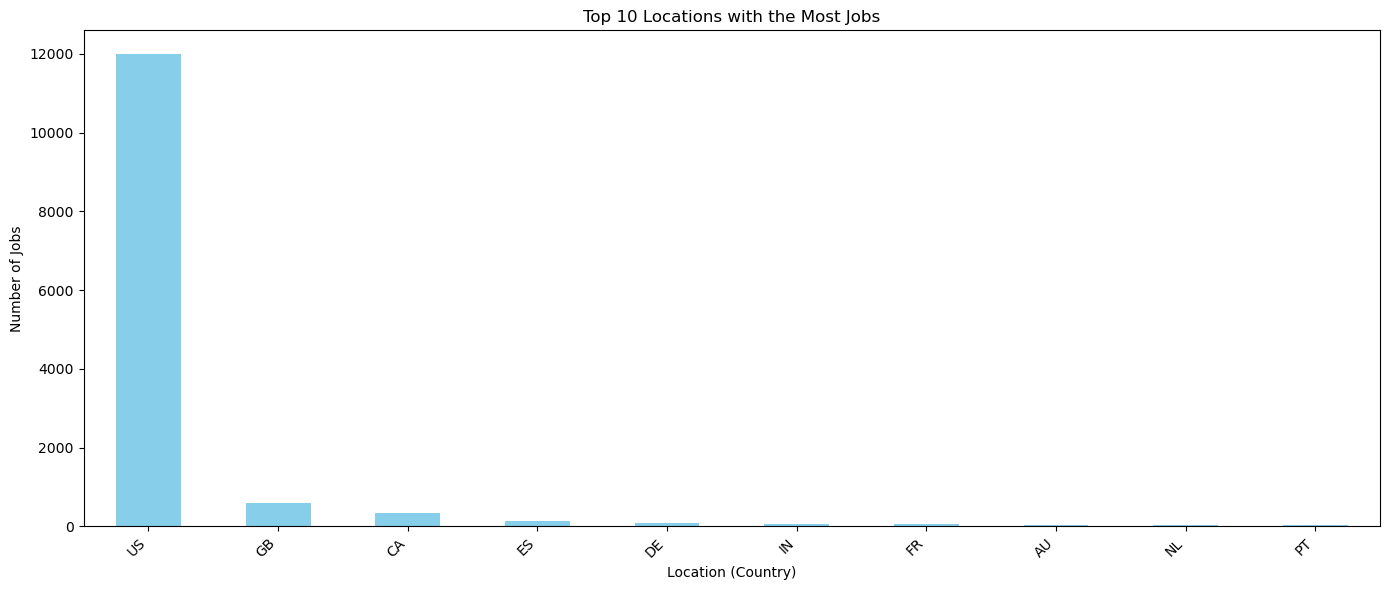

In [61]:
# jobs by location for top 10 countries

top_locations = data_analysis_df['company_location'].value_counts().head(10)

plt.figure(figsize=(14, 6))  # Increase figure width for readability
top_locations.plot(kind='bar', color='skyblue')
plt.title('Top 10 Locations with the Most Jobs')
plt.xlabel('Location (Country)')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45, ha='right')  # Rotate labels for readability
plt.tight_layout()
plt.show()


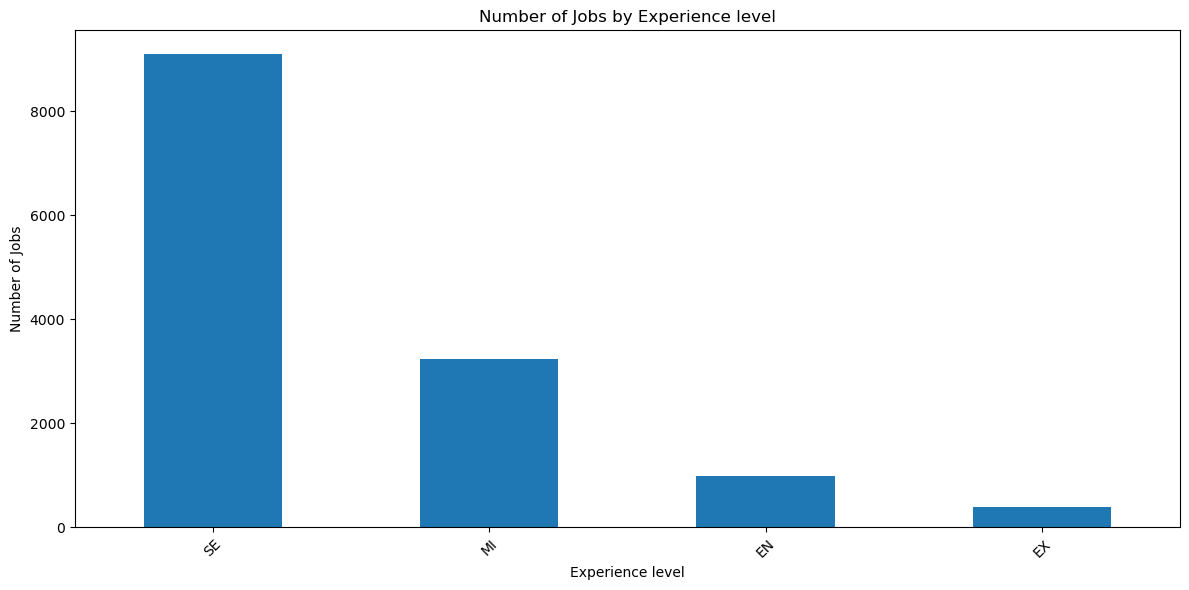

In [62]:
#jobs by level 
job_counts_by_experience = data_analysis_df['experience_level'].value_counts()
plt.figure(figsize=(12, 6))
job_counts_by_experience.plot(kind='bar')
plt.title('Number of Jobs by Experience level')
plt.xlabel('Experience level')
plt.ylabel('Number of Jobs')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


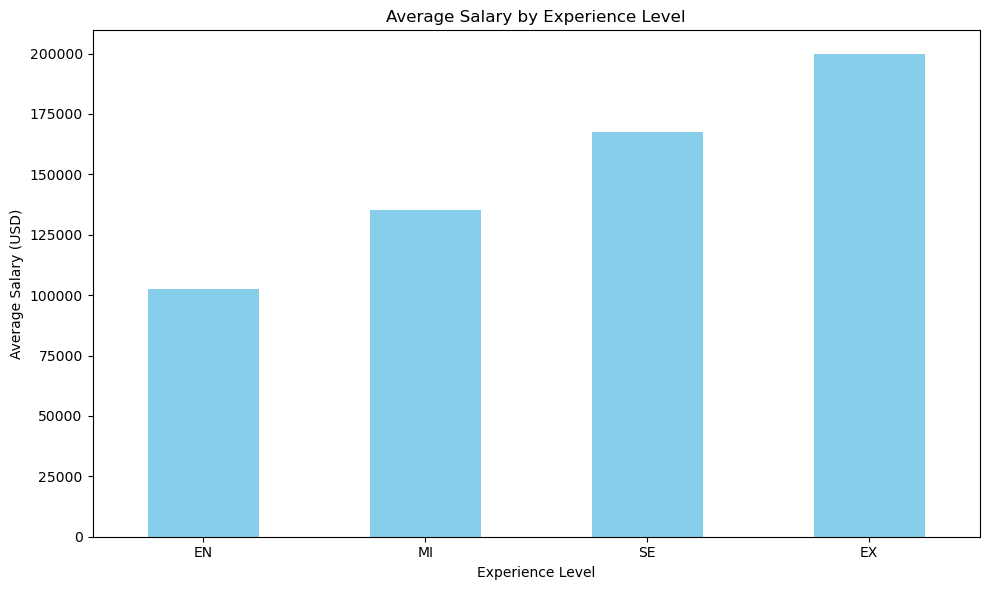

In [63]:
#jobs by level and salary in the US 
us_data = data_analysis_df[data_analysis_df['company_location'] == 'US']

average_salary_by_experience = us_data.groupby('experience_level')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(10, 6))
average_salary_by_experience.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

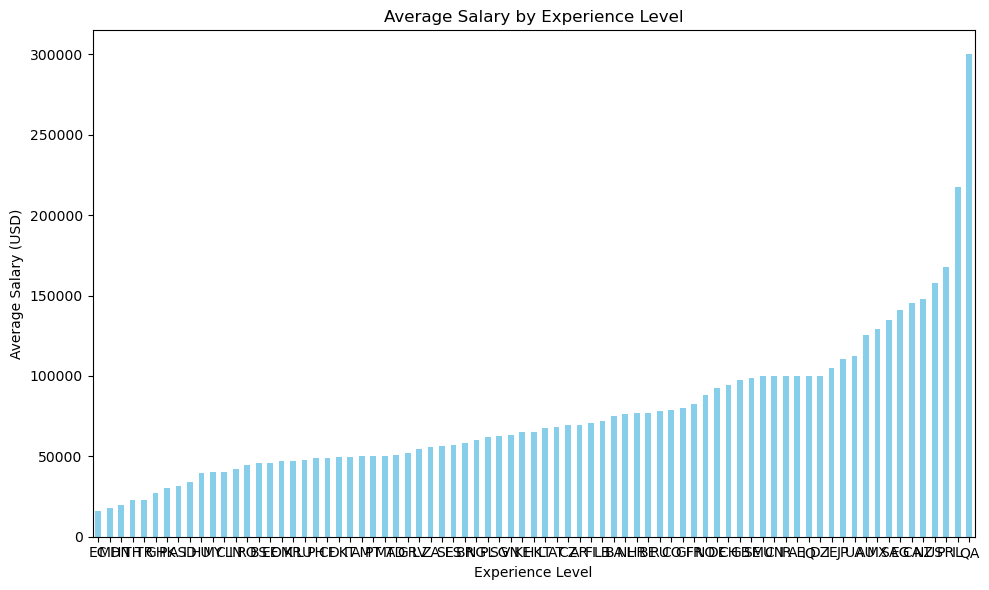

In [64]:
#average salary by location 

average_salary_by_location = data_analysis_df.groupby('company_location')['salary_in_usd'].mean().sort_values()

plt.figure(figsize=(10, 6))
average_salary_by_location.plot(kind='bar', color='skyblue')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

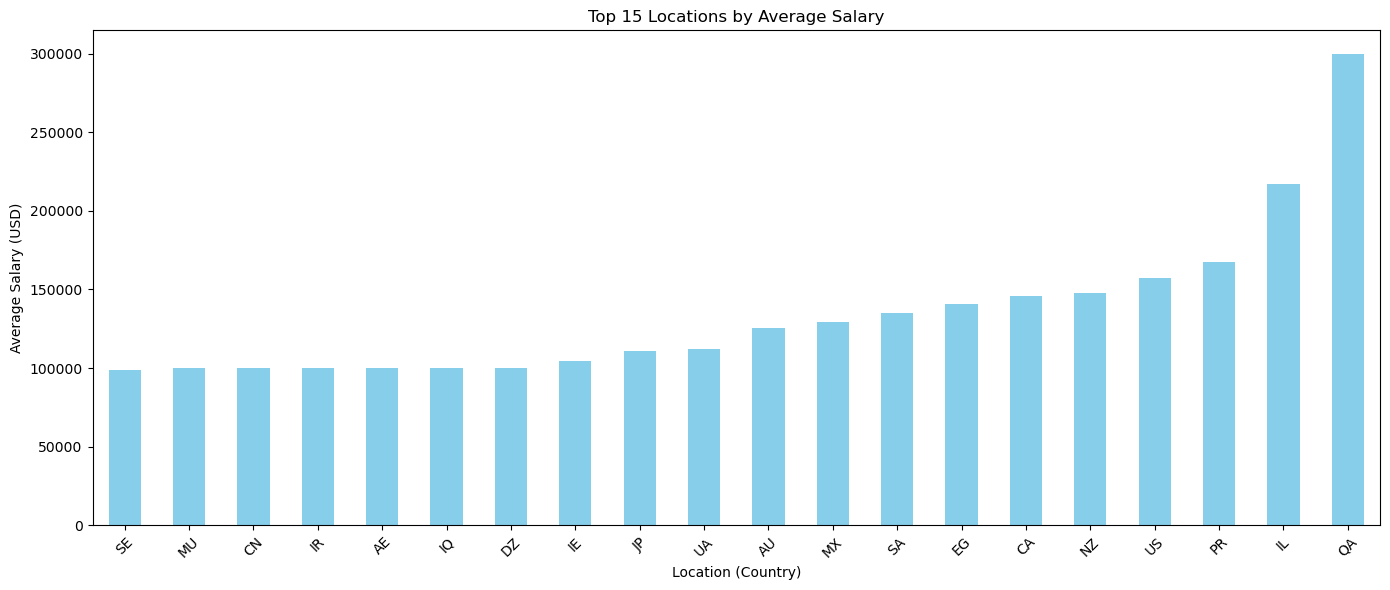

In [65]:
#average salary by location for top 20 
top_salary_locations = average_salary_by_location.tail(20)

plt.figure(figsize=(14, 6))  # Increase figure width
top_salary_locations.plot(kind='bar', color='skyblue')
plt.title('Top 15 Locations by Average Salary')
plt.xlabel('Location (Country)')
plt.ylabel('Average Salary (USD)')
plt.xticks(rotation=45)  # Rotate labels for readability
plt.tight_layout()
plt.show()


<module 'matplotlib.pyplot' from 'C:\\Users\\anvin\\anaconda3\\envs\\dev\\lib\\site-packages\\matplotlib\\pyplot.py'>

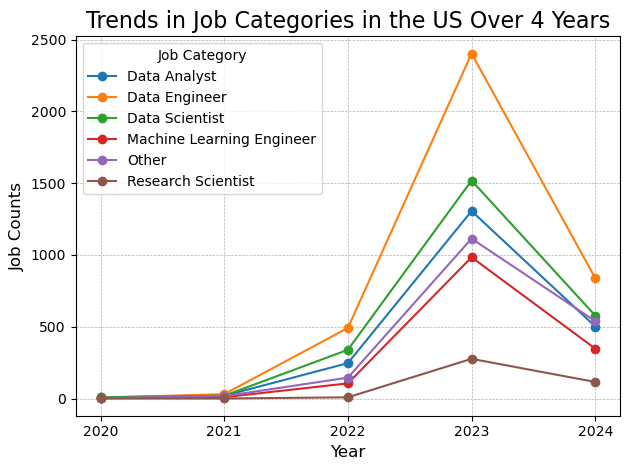

In [66]:
#Resave the file as json 

us_data = data_analysis_df[data_analysis_df['company_location'] == 'US']

# Group by year and job category to get counts
us_job_categories = us_data.groupby(['work_year', 'Job_Category']).size().reset_index(name='count')

# Create a pivot table for visualization
pivot_data = us_job_categories.pivot(index='work_year', columns='Job_Category', values='count')

# Plotting the trends for job categories over the years
pivot_data.plot(kind='line', marker='o')

# Add title and labels
plt.title('Trends in Job Categories in the US Over 4 Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Job Counts', fontsize=12)
plt.legend(title='Job Category', loc='upper left')
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xticks(range(min(pivot_data.index), max(pivot_data.index) + 1, 1))
plt.tight_layout()
plt

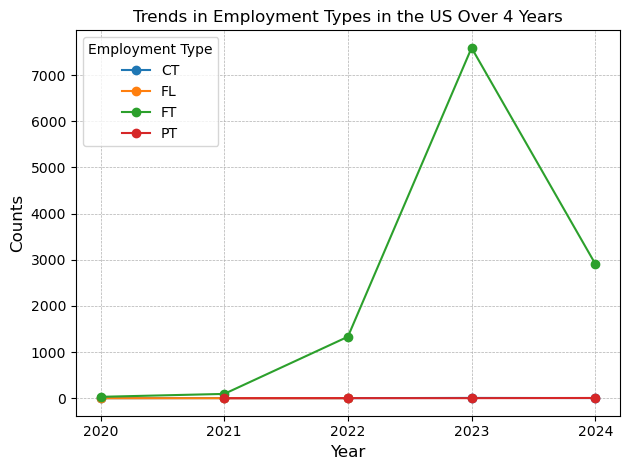

In [67]:
# trends in employment type

# Group by year and employment type to get counts
employment_type_trends = us_data.groupby(['work_year', 'employment_type']).size().reset_index(name='count')

# Create a pivot table for visualization
pivot_employment_data = employment_type_trends.pivot(index='work_year', columns='employment_type', values='count')

# Plotting the trends for employment types over the years
pivot_employment_data.plot(kind='line', marker='o')

# Add title and labels
plt.title('Trends in Employment Types in the US Over 4 Years')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.legend(title='Employment Type', loc='upper left')
plt.grid(visible=True, linestyle='--', linewidth=0.5)
plt.xticks(range(min(pivot_employment_data.index), max(pivot_employment_data.index) + 1, 1))
plt.tight_layout()

# Show the plot
plt.show()

In [68]:
# Connect to MongoDB (modify the connection string as needed for your MongoDB setup)
client = MongoClient("mongodb://localhost:27017/")


In [69]:
# Create or connect to a database
db = client['data_analysis_db']

# Create or connect to a collection
collection = db['salaries_collection']


In [70]:
# Convert DataFrame to dictionary
data_dict = data_analysis_df.to_dict("records")

In [71]:
# Insert data into MongoDB collection
collection.insert_many(data_dict)

InsertManyResult([ObjectId('673fa3cb18296cbf27215276'), ObjectId('673fa3cb18296cbf27215277'), ObjectId('673fa3cb18296cbf27215278'), ObjectId('673fa3cb18296cbf27215279'), ObjectId('673fa3cb18296cbf2721527a'), ObjectId('673fa3cb18296cbf2721527b'), ObjectId('673fa3cb18296cbf2721527c'), ObjectId('673fa3cb18296cbf2721527d'), ObjectId('673fa3cb18296cbf2721527e'), ObjectId('673fa3cb18296cbf2721527f'), ObjectId('673fa3cb18296cbf27215280'), ObjectId('673fa3cb18296cbf27215281'), ObjectId('673fa3cb18296cbf27215282'), ObjectId('673fa3cb18296cbf27215283'), ObjectId('673fa3cb18296cbf27215284'), ObjectId('673fa3cb18296cbf27215285'), ObjectId('673fa3cb18296cbf27215286'), ObjectId('673fa3cb18296cbf27215287'), ObjectId('673fa3cb18296cbf27215288'), ObjectId('673fa3cb18296cbf27215289'), ObjectId('673fa3cb18296cbf2721528a'), ObjectId('673fa3cb18296cbf2721528b'), ObjectId('673fa3cb18296cbf2721528c'), ObjectId('673fa3cb18296cbf2721528d'), ObjectId('673fa3cb18296cbf2721528e'), ObjectId('673fa3cb18296cbf272152

In [82]:
import json
from bson import json_util

# Get all records instead of just one
Mongo_records = list(collection.find())  # Convert cursor to list

# Save all records to JSON file
try:
    with open('project3data.json', 'w') as file:
        json.dump(Mongo_records, file, 
                 indent=4,
                 default=json_util.default)
    print(f"Successfully saved {len(Mongo_records)} records to JSON file")
except Exception as e:
    print(f"Error saving file: {e}")

Successfully saved 27460 records to JSON file


In [87]:
Mongo_records = collection.find_one()
print(Mongo_records)

{'_id': ObjectId('673ece9c18296cbf27211cd3'), 'work_year': 2024, 'experience_level': 'MI', 'employment_type': 'FT', 'job_title': 'AI Architect', 'salary': 800000, 'salary_currency': 'USD', 'salary_in_usd': 800000, 'employee_residence': 'CA', 'remote_ratio': 100, 'company_location': 'CA', 'company_size': 'M', 'Job_Category': 'Other'}


In [88]:
# Fetch all records from the collection
Mongo_records = collection.find()

# Print each record
for record in Mongo_records:
    print(record)

{'_id': ObjectId('673ece9c18296cbf27211cd3'), 'work_year': 2024, 'experience_level': 'MI', 'employment_type': 'FT', 'job_title': 'AI Architect', 'salary': 800000, 'salary_currency': 'USD', 'salary_in_usd': 800000, 'employee_residence': 'CA', 'remote_ratio': 100, 'company_location': 'CA', 'company_size': 'M', 'Job_Category': 'Other'}
{'_id': ObjectId('673ece9c18296cbf27211cd4'), 'work_year': 2023, 'experience_level': 'EN', 'employment_type': 'FT', 'job_title': 'Data DevOps Engineer', 'salary': 44382, 'salary_currency': 'EUR', 'salary_in_usd': 47918, 'employee_residence': 'NL', 'remote_ratio': 50, 'company_location': 'NL', 'company_size': 'L', 'Job_Category': 'Data Engineer'}
{'_id': ObjectId('673ece9c18296cbf27211cd5'), 'work_year': 2024, 'experience_level': 'EN', 'employment_type': 'FT', 'job_title': 'Data Analyst', 'salary': 40100, 'salary_currency': 'EUR', 'salary_in_usd': 44555, 'employee_residence': 'LT', 'remote_ratio': 0, 'company_location': 'LT', 'company_size': 'M', 'Job_Catego

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# visuals in javascript

In [ ]:
# Create a leaflet map to show locations with markers. 
#Geographical Analysis: Visualizing popular job locations for data science roles.
